# Convolutional Neural Network (CNN)

In [1]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision 
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [2]:
# hyper-parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [3]:
# dataset has PILImage images of range [0, 1].
# we transform then to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

train_dataset = torchvision.datasets.CIFAR10(root='./data', 
                                           train=True, 
                                           transform=transform,  
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', 
                                           train=False, 
                                           transform=transform)

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


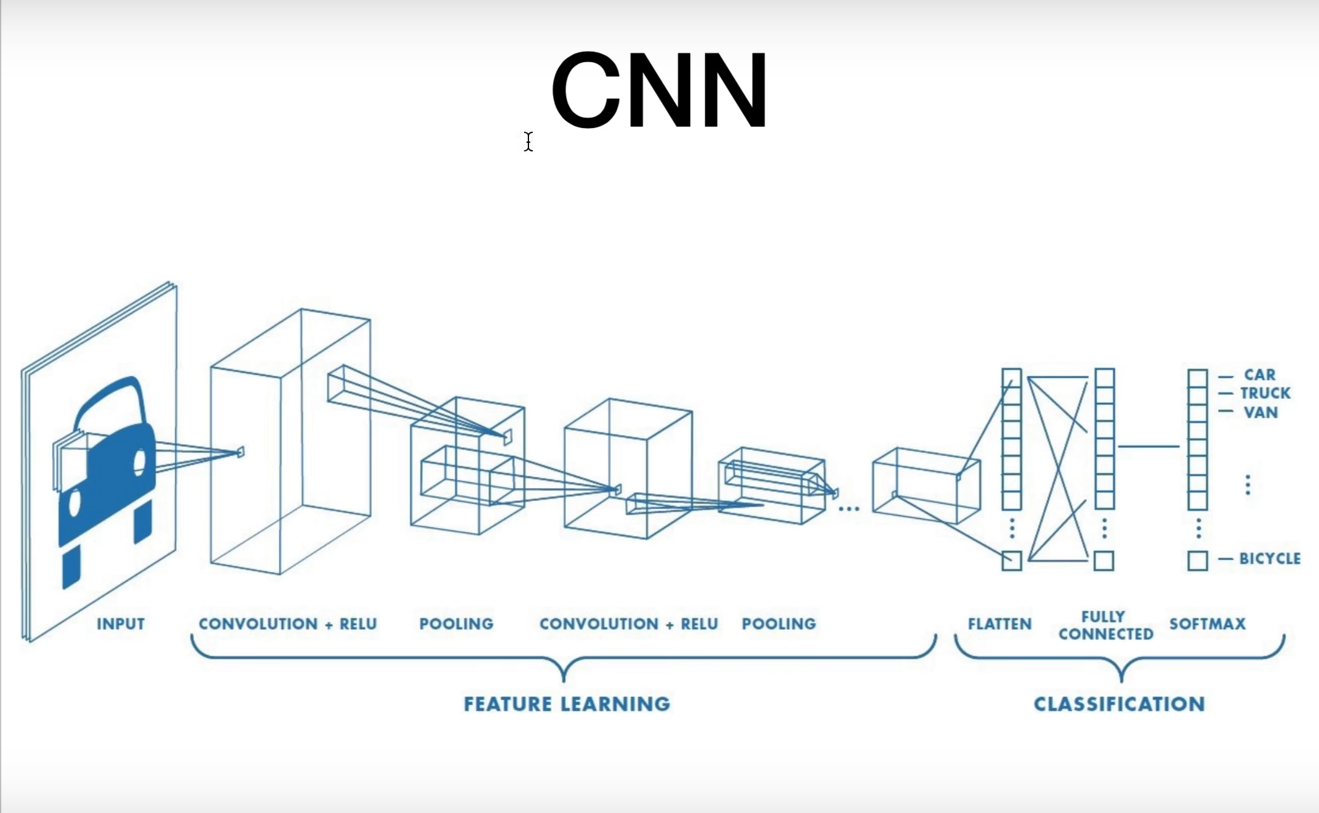

In [4]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

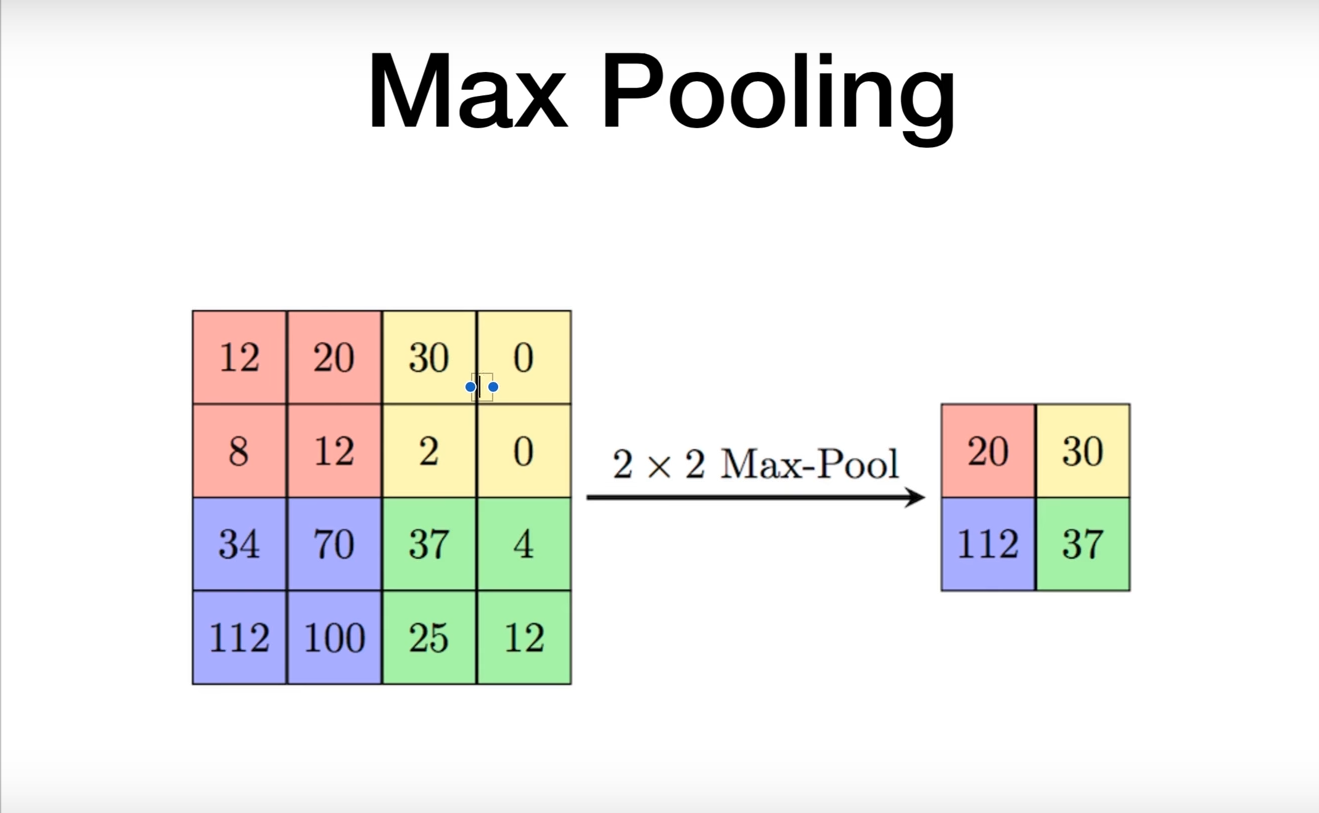

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Epoch [1/4], Step [2000/12500], Loss: 2.3017
Epoch [1/4], Step [4000/12500], Loss: 2.2806
Epoch [1/4], Step [6000/12500], Loss: 2.3014
Epoch [1/4], Step [8000/12500], Loss: 2.2962
Epoch [1/4], Step [10000/12500], Loss: 2.3037
Epoch [1/4], Step [12000/12500], Loss: 2.2796
Epoch [2/4], Step [2000/12500], Loss: 2.5325
Epoch [2/4], Step [4000/12500], Loss: 2.1456
Epoch [2/4], Step [6000/12500], Loss: 1.6759
Epoch [2/4], Step [8000/12500], Loss: 1.9139
Epoch [2/4], Step [10000/12500], Loss: 2.5308
Epoch [2/4], Step [12000/12500], Loss: 1.8862
Epoch [3/4], Step [2000/12500], Loss: 1.7235
Epoch [3/4], Step [4000/12500], Loss: 2.2854
Epoch [3/4], Step [6000/12500], Loss: 1.3871
Epoch [3/4], Step [8000/12500], Loss: 1.8327
Epoch [3/4], Step [10000/12500], Loss: 2.0126
Epoch [3/4], Step [12000/12500], Loss: 1.4381
Epoch [4/4], Step [2000/12500], Loss: 1.0845
Epoch [4/4], Step [4000/12500], Loss: 1.8812
Epoch [4/4], Step [6000/12500], Loss: 0.8867
Epoch [4/4], Step [8000/12500], Loss: 1.0453
Epoc